## Lead Scoring Case Study

### Problem Statement

X Education, an online education company, seeks to enhance its lead conversion process. The company generates leads through website visits, form submissions, video views, and referrals. The current lead conversion rate is 30%, and the CEO desires to increase it to around 80%. Your task is to build a logistic regression model that assigns a lead score (between 0 and 100) to each lead, aiding the identification of leads with a higher likelihood of conversion.

### Goals of the Case Study

1. **Build a Logistic Regression Model:**
   - Develop a model to assign lead scores, allowing the company to target potential leads effectively.

2. **Adaptability for Future Changes:**
   - Ensure the model can be adjusted to meet any future changes in the company's requirements.

### Steps

1. Read and Understand the Data
2. Clean the Data
3. Prepare the Data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

### Approach

1. **Read and Understand the Data:**
   - Familiarize yourself with the dataset to gain insights into lead characteristics.

2. **Clean the Data:**
   - Address missing values, handle outliers, and ensure data integrity.

3. **Prepare the Data for Model Building:**
   - Encode categorical variables, scale numerical features, and split the data into training and testing sets.

4. **Model Building:**
   - Utilize logistic regression to predict lead scores based on historical data.

5. **Model Evaluation:**
   - Assess the model's performance using relevant metrics such as accuracy, precision, recall, and F1-score.

6. **Making Predictions on the Test Set:**
   - Apply the trained model to predict lead scores for new data.

### Next Steps

1. **Model Fine-Tuning:**
   - Optimize the model parameters to improve performance.

2. **Handling Future Changes:**
   - Implement strategies to adapt the model to potential changes in lead generation or conversion processes.

3. **Continuous Monitoring:**
   - Regularly assess the model's performance and update as needed to meet evolving business requirements.

By following this structured approach, X Education aims to efficiently target leads with a higher likelihood of conversion, contributing to the company's overall goal of achieving an 80% lead conversion rate.


In [155]:
# import lib
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [156]:
# Reading data 
leads=pd.read_csv('Leads.csv')

# Data Look up 
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [157]:
# Shape Check 
leads.shape

(9240, 37)

In [158]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [159]:
# Info check 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [160]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Step 1: Data Cleaning and Preparation

In [161]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [162]:
# Checking the number of duplicates present in each columns 
duplicates_in_columns = leads.apply(lambda x: x.duplicated().sum())

# Print the results
print(duplicates_in_columns)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                      9235
Lead Source                                      9218
Do Not Email                                     9238
Do Not Call                                      9238
Converted                                        9238
TotalVisits                                      9198
Total Time Spent on Website                      7509
Page Views Per Visit                             9125
Last Activity                                    9222
Country                                          9201
Specialization                                   9220
How did you hear about X Education               9229
What is your current occupation                  9233
What matters most to you in choosing a course    9236
Search                                           9238
Magazine                                         9239
Newspaper Article           

In [163]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'],axis= 1, inplace = True)

In [164]:
leads.drop(['City'], axis = 1, inplace = True)

In [165]:
leads.drop(['Country'], axis = 1, inplace = True)

In [166]:
#data check
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,Select,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,Select,02.Medium,01.High,15.0,18.0,No,No,Modified


In [167]:
# Looking into the value counts of each columns , using loop for doing it in one go 

for i in leads:
    print('___________________________________________________')
    print(leads[i].astype('category').value_counts())
    print('___________________________________________________')
  

___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
___________________________________________________
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
___________________________________________________
__________

In [168]:
#Replacing 'Select' values with Nan
leads=leads.replace("Select", np.nan)

In [169]:

#Checking for count of missing values in each column
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [170]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [171]:
# Dropping all the columns which have missing values more then 35%

for i in leads.columns:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 35):
        leads.drop(i, axis=1, inplace = True)

In [172]:
#checking percentage of null values again in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Newspaper                                         0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Magazine                                          0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Search    

#### Segmentation into categorical columns and numerical columns
 

In [173]:
# Creating list of categorical col
cat_col=[]
num_col=[]
for i in leads.columns:
    if leads[i].dtype=='object' or leads[i].dtype=='O':
        cat_col.append(i)
    else:
        num_col.append(i)

print(cat_col)
print(num_col)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### Analysis of Catergorical Columns


In [174]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt 

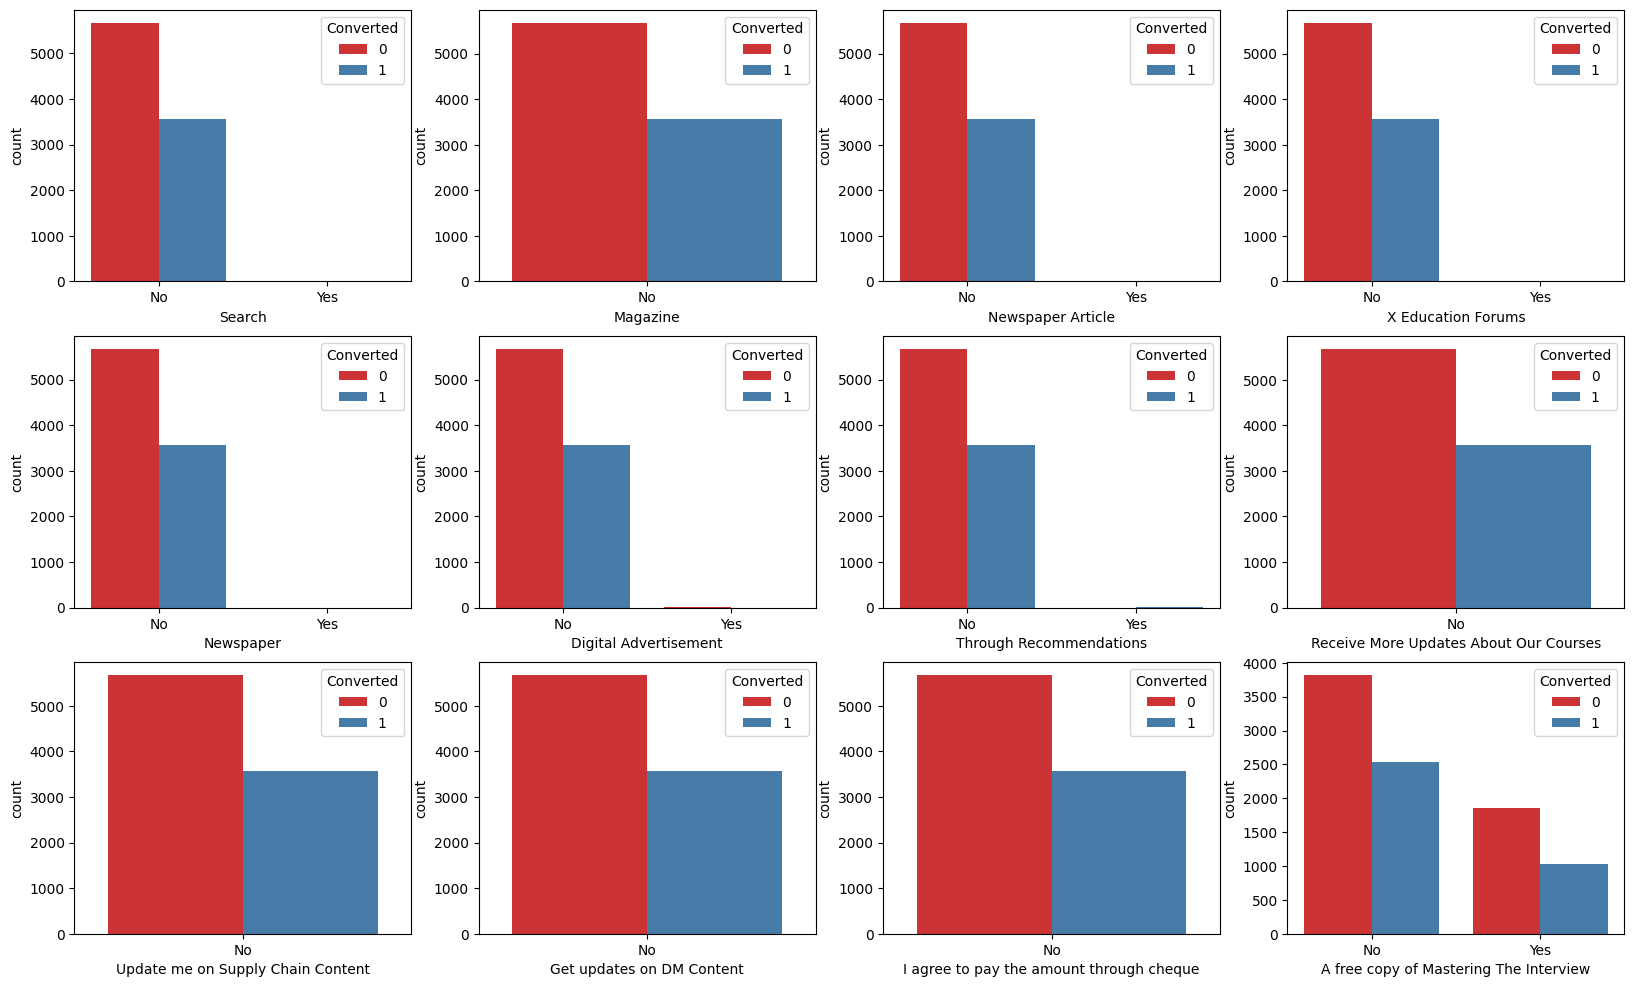

In [182]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads, ax = axs[0,0],palette = 'Set1')
sns.countplot(x = "Magazine", hue = "Converted", data = leads, ax = axs[0,1],palette = 'Set1')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads, ax = axs[0,2],palette = 'Set1')
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads, ax = axs[0,3],palette = 'Set1')
sns.countplot(x = "Newspaper", hue = "Converted", data = leads, ax = axs[1,0],palette = 'Set1')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads, ax = axs[1,1],palette = 'Set1')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads, ax = axs[1,2],palette = 'Set1')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads, ax = axs[1,3],palette = 'Set1')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads, ax = axs[2,0],palette = 'Set1')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads, ax = axs[2,1],palette = 'Set1')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads, ax = axs[2,2],palette = 'Set1')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads, ax = axs[2,3],palette = 'Set1')
plt.show()